In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dff=pd.read_csv('D:\LEARNING AI\EDA/titanic.csv')

In [3]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 2   HANDLING THE MISSING VALUE

#  2.1 NUMERICAL MISSING

In [5]:
dff.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#identifying missing valur type
#since embarked has 2 missinng it is in mcar
#now we can check in embark which position in row is misiing
dff[dff['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
#age comes in mar 
# cabin comes in mnar

In [8]:
#Handling the misiing value method

In [9]:
#1 mean/meadian/mode immputation
#in this i am reading thrre random coloumn and searching the missing and plotting it
dff=pd.read_csv('D:\LEARNING AI\EDA/titanic.csv',usecols=['Age','Fare','Survived'])

In [10]:
dff

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [11]:
dff.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

1.  Mean /Median /mode imputation

In [12]:
#inhere we find that age has null vale , since age is a numerical value we use mean or meadian,
#here i prefer median so that if a outlayer come also it has no issue in solutiom


In [13]:
#first of all i want to  creat a coloumn name name age_meadin ,in which it contatin value of age and it null space is filled with meadian
z=dff['Age'].median()
dff['Age_median']=dff['Age'].fillna(z)

In [14]:
#writing function so that we dont need to take mean every time
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
impute_nan(dff,'Age',z)

In [15]:
dff['Age_median']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median, Length: 891, dtype: float64

In [16]:
dff

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


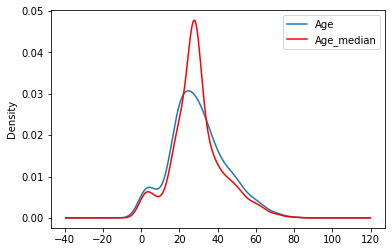

In [17]:
#plotting age and age median
# plt.plot(['Age'], label='Age')
# plt.plot(['Age_median'], label='Age_median')
dff['Age'].plot(kind='kde')
dff['Age_median'].plot(kind='kde',color='red')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

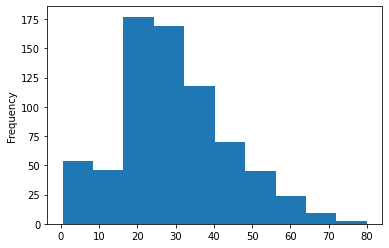

In [18]:
dff['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

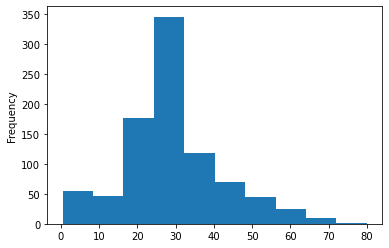

In [19]:
dff['Age_median'].plot(kind='hist')

2. Random Sample ImpuTaion

In [20]:
dff=pd.read_csv('D:\LEARNING AI\EDA/titanic.csv',usecols=['Age','Fare','Survived'])
x=dff['Age'].dropna().sample(dff['Age'].isnull().sum(), random_state=0)

In [21]:
# Creating the new feature with respect to Median
def impute_nan(df,variable,median):
    dff[variable+"_median"] = dff[variable].fillna(median)
    dff[variable+"_random"]=dff[variable]
    ##It will have the random sample to fill the na
    x = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
   

In [22]:
x

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
z=dff['Age'].median()
dff['Age_median']=dff['Age'].fillna(z)

In [24]:
z

28.0

In [25]:
#step2 finding null value index and replacing it with random value index
dff[dff['Age'].isnull()].index


Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
#step3 replacing null value index with random value index ie x
x.index=dff[dff['Age'].isnull()].index

In [27]:
x

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
#step4 adding random value in the x inside age null places
dff['Age_random']=dff['Age'].fillna(x)
#or
# dff.loc[dff['Age'].isnull(),'Age']=x

In [29]:
dff

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [30]:
dff

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [31]:
dff.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

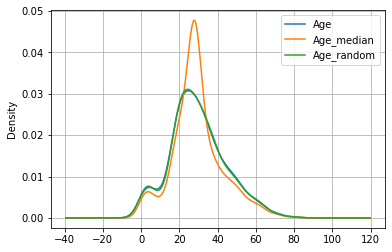

In [32]:
#plotting th grap based on age,age_median and age_random
dff['Age'].plot(kind='kde',label='Age')
dff['Age_median'].plot(kind='kde',label='Age_median')
dff['Age_random'].plot(kind='kde',label='Age_random')
plt.legend()
plt.grid()
plt.show()

3.Capturing NAN with New feature

In [33]:
dff=pd.read_csv('D:\LEARNING AI\EDA/titanic.csv',usecols=['Age','Fare','Survived'])

In [34]:
dff['Age_nan']=np.where(dff['Age'].isnull(),1,0)
dff['Age'].fillna(dff['Age'].median(),inplace=True)

In [35]:
dff['Age_nan'].value_counts()

0    714
1    177
Name: Age_nan, dtype: int64

In [36]:
dff

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


4. End of distribution imputation

In [37]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

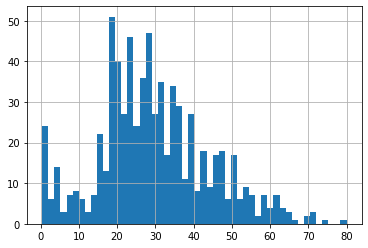

In [38]:
df.Age.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

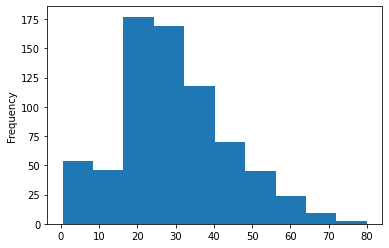

In [39]:
#or
df['Age'].plot(kind='hist')

In [40]:
#step3 find 3 std point after mean
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
df['Age'].mean()

29.69911764705882

In [42]:
dff['Age'].std()

13.019696550973194

In [43]:
#mean after 3 std
x= df['Age'].mean()+3*df['Age'].std()

In [44]:
x

73.27860964406095

In [45]:
df['Age_extreme']=df['Age'].fillna(x)

In [46]:
df['Age_extreme']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    73.27861
889    26.00000
890    32.00000
Name: Age_extreme, Length: 891, dtype: float64

In [47]:
df

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


c:\Users\arjunkurup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


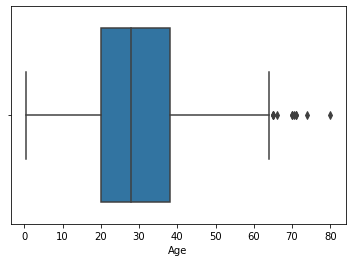

In [48]:
#boxploting with respect to age and age_extreme
import seaborn as sns
#age plot
sns.boxplot('Age',data=df)
plt.show()

c:\Users\arjunkurup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


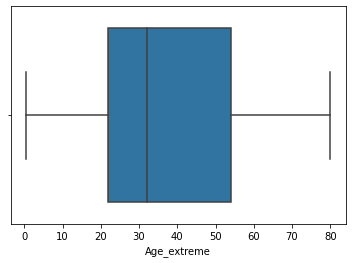

In [49]:
#age_extreme boxplot
sns.boxplot('Age_extreme',data=df)
plt.show()


2.1 How to handle categorical MIssing  value

 frequent catagory imputation

In [50]:
#step1 importing

data=pd.read_csv('E:\LEARNING AI\EDA/loan.csv')

In [51]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [52]:
df=pd.read_csv('E:\LEARNING AI\EDA/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [54]:
#step2 find total number of missing in selected categorical coloumn
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [55]:
#step3 taking  mode
df['BsmtQual'].mode()[0]

'TA'

<AxesSubplot:>

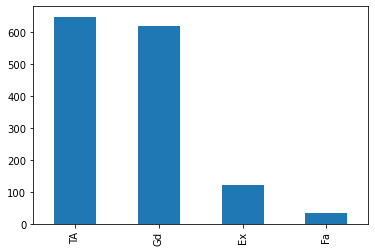

In [56]:
df['BsmtQual'].value_counts().plot(kind='bar')

 Handle Categorical Features

Nominal Number Encoding

1, ONE HOT ENCODING

In [57]:
import pandas as pd
import numpy as np
dff=pd.read_csv('E:\LEARNING AI\EDA/titanic.csv')

In [58]:
dff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
#step 2 we are taking unique of sex and embark column to check it is nominal or ordinal
dff['Sex'].unique()

array(['male', 'female'], dtype=object)

In [60]:
dff['Sex'].nunique()

2

In [61]:
dff['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [62]:
#since nan come i just simply dropping null in table
dff.dropna(inplace=True)

In [63]:
dff['Embarked'].isnull().sum()

0

In [64]:
dff['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [65]:
dff['Embarked'].nunique()

3

In [66]:
#step 3 creating dummies for sex and embark for converting it into numerical

data=pd.get_dummies(dff,columns=['Sex','Embarked'],).head()

In [67]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [68]:
#step4 reducing dimension,ie column -1

data=pd.get_dummies(dff,columns=['Sex','Embarked'],drop_first=True).head()

In [69]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,1


One Hot Encoding with Many Features

In [70]:
dff=pd.read_csv('E:\LEARNING AI\EDA/mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [71]:
dff.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [72]:
#step2 finding number of unique in each column

In [73]:
dff['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [74]:
dff['X0'].nunique()

47

In [75]:
for i in dff:
    print(len(dff[i].unique()))

47
27
44
7
4
29
12


In [76]:
data=dff['X0'].value_counts().sort_values(ascending=False).head(10).index

In [77]:
data

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [78]:
for i in data:
    dff[i]=np.where(dff['X0']==i,1,0)

In [79]:
dff

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [80]:
#same like this next we want too create binary column of x1 

data1=dff['X1'].value_counts().head(10).index



In [81]:
data1

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [82]:
#now again we want to create dummies of x1 in main table

for i in data1:
    dff[i]= np.where(dff['X1']==i,1,0)

In [83]:
dff

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,w,aa,s,b,l,v,r,i,a,c
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [84]:
#like this way we want to create dummies of x6 ,x4,x5 has less than 10 so we no need to find top 10

2 ORDINAL ENCODING

2.1 Label Encoding

In [85]:
dff=pd.read_csv('E:\LEARNING AI\EDA/days.csv')

In [86]:
dff

,Unnamed: 0,Day,weekday
0,0,2022-04-27 09:25:37.633555,Wednesday
1,1,2022-04-26 09:25:37.633555,Tuesday
2,2,2022-04-25 09:25:37.633555,Monday
3,3,2022-04-24 09:25:37.633555,Sunday
4,4,2022-04-23 09:25:37.633555,Saturday
5,5,2022-04-22 09:25:37.633555,Friday
6,6,2022-04-21 09:25:37.633555,Thursday
7,7,2022-04-20 09:25:37.633555,Wednesday
8,8,2022-04-19 09:25:37.633555,Tuesday
9,9,2022-04-18 09:25:37.633555,Monday


In [87]:
#step2 giving rank to each days
rankdict={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [88]:
#step3 maping this rankvalue inside main table
dff['Week_ordinal']=dff['weekday'].map(rankdict)  

In [89]:
dff

,Unnamed: 0,Day,weekday,Week_ordinal
0,0,2022-04-27 09:25:37.633555,Wednesday,3
1,1,2022-04-26 09:25:37.633555,Tuesday,2
2,2,2022-04-25 09:25:37.633555,Monday,1
3,3,2022-04-24 09:25:37.633555,Sunday,7
4,4,2022-04-23 09:25:37.633555,Saturday,6
5,5,2022-04-22 09:25:37.633555,Friday,5
6,6,2022-04-21 09:25:37.633555,Thursday,4
7,7,2022-04-20 09:25:37.633555,Wednesday,3
8,8,2022-04-19 09:25:37.633555,Tuesday,2
9,9,2022-04-18 09:25:37.633555,Monday,1


COUNT OR FREQUENCY ENCODING

In [90]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()     

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
train_set.drop(0,axis=1,inplace=True)

In [92]:
#step2 selecting needed columns
columns=[1,3,5,6,7,8,9,13]
train_set =train_set[columns]

In [93]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [94]:
#step3 changing column name

train_set.columns

Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')

In [95]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [96]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [97]:
#step4 finding the number of uniques in each column to chek which method we can use in nominal

for i in train_set.columns:
    print(i,":",train_set[i].nunique(),'unique')

Employment : 9 unique
Degree : 16 unique
Status : 7 unique
Designation : 15 unique
family_job : 6 unique
Race : 5 unique
Sex : 2 unique
Country : 42 unique


In [98]:
#in here country has 47 unique value ,so onehot encode create lot of column , to avoid this issue we use cunt or frequencey encoding method

In [99]:
#step5 taking value count of country  and converting it into dict
x=train_set['Country'].value_counts().to_dict()

In [100]:
x

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [101]:
#step6 mapping

train_set['Country']=train_set['Country'].map(x)

In [102]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


In [103]:
#Target guided ordinal encoding

In [104]:
dff=pd.read_csv('E:\LEARNING AI\EDA/titanic.csv',usecols=['Cabin','Survived'])

In [105]:
dff

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [106]:
dff['Cabin'].fillna('missing',inplace=True)

In [107]:
dff['Cabin']=dff['Cabin'].astype(str).str[0]

In [108]:
dff

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m
...,...,...
886,0,m
887,1,B
888,0,m
889,1,C


In [109]:
x=dff.groupby('Cabin')['Survived'].mean().sort_values().index

In [110]:
x

Index(['T', 'm', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [111]:
data = {k:i for i,k in enumerate(x)}

In [112]:
data

{'T': 0, 'm': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [113]:
dff['cabin_ordinal']=dff['Cabin'].map(data)

In [114]:
dff

,Survived,Cabin,cabin_ordinal
0,0,m,1
1,1,C,4
2,1,m,1
3,1,C,4
4,0,m,1
...,...,...,...
886,0,m,1
887,1,B,6
888,0,m,1
889,1,C,4


MEAN ENCODING BASED ON TARGET(ORDINAL)

In [115]:
dff=pd.read_csv('E:\LEARNING AI\EDA/titanic.csv',usecols=['Cabin','Survived'])

In [116]:
dff

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [117]:
dff['Cabin'].fillna('missing',inplace=True)

In [118]:
dff['Cabin']=dff['Cabin'].astype(str).str[0]

In [119]:
dff

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m
...,...,...
886,0,m
887,1,B
888,0,m
889,1,C


In [120]:
x=dff.groupby('Cabin')['Survived'].mean().to_dict()

In [121]:
x

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'm': 0.29985443959243085}

In [122]:
dff['mean_ordinal']=dff['Cabin'].map(x)

In [123]:
dff

,Survived,Cabin,mean_ordinal
0,0,m,0.299854
1,1,C,0.593220
2,1,m,0.299854
3,1,C,0.593220
4,0,m,0.299854
...,...,...,...
886,0,m,0.299854
887,1,B,0.744681
888,0,m,0.299854
889,1,C,0.593220


SCALING 

1 STANDARDIZATION SCALING

In [124]:
dff=pd.read_csv('E:\LEARNING AI\EDA/titanic.csv',usecols=['Age','Fare','Survived'])

In [125]:
dff

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [126]:
dff.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [127]:
x=dff['Age'].median()

In [128]:
dff['Age'].fillna(x,inplace=True)

In [129]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [130]:
data = sc.fit_transform(dff)

In [131]:
data

array([[-0.78927234, -0.56573646, -0.50244517],
       [ 1.2669898 ,  0.66386103,  0.78684529],
       [ 1.2669898 , -0.25833709, -0.48885426],
       ...,
       [-0.78927234, -0.1046374 , -0.17626324],
       [ 1.2669898 , -0.25833709, -0.04438104],
       [-0.78927234,  0.20276197, -0.49237783]])

In [132]:
df=pd.DataFrame(data,columns = ['Survived','Age','Fare'])

In [133]:
df

,Survived,Age,Fare
0,-0.789272,-0.565736,-0.502445
1,1.266990,0.663861,0.786845
2,1.266990,-0.258337,-0.488854
3,1.266990,0.433312,0.420730
4,-0.789272,0.433312,-0.486337
...,...,...,...
886,-0.789272,-0.181487,-0.386671
887,1.266990,-0.796286,-0.044381
888,-0.789272,-0.104637,-0.176263
889,1.266990,-0.258337,-0.044381


In [134]:
df.describe()

,Survived,Age,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.287732e-16,3.841546e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-2.224156e+00,-6.484217e-01
25%,-7.892723e-01,-5.657365e-01,-4.891482e-01
50%,-7.892723e-01,-1.046374e-01,-3.573909e-01
75%,1.266990e+00,4.333115e-01,-2.424635e-02
max,1.266990e+00,3.891554e+00,9.667167e+00


In [135]:
import matplotlib.pyplot as plt
%marplotlib inline

UsageError: Line magic function `%marplotlib` not found.


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.22415608, -1.61258503, -1.00101397, -0.38944292,  0.22212813,
         0.83369919,  1.44527024,  2.05684129,  2.66841235,  3.2799834 ,
         3.89155445]),
 <BarContainer object of 10 artists>)

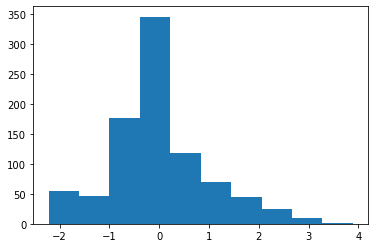

In [136]:
plt.hist(df['Age'])

2 MINMAX SCALING

In [137]:
dff=pd.read_csv('E:\LEARNING AI\EDA/titanic.csv',usecols=['Age','Fare','Survived'])

In [138]:
dff

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [139]:
x=dff['Age'].median()


In [140]:
dff['Age'].fillna(x,inplace=True)

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
minmax= MinMaxScaler()

In [143]:
data1=minmax.fit_transform(dff)

In [144]:
data1

array([[0.        , 0.27117366, 0.01415106],
       [1.        , 0.4722292 , 0.13913574],
       [1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 0.34656949, 0.04577135],
       [1.        , 0.32143755, 0.0585561 ],
       [0.        , 0.39683338, 0.01512699]])

In [145]:
dataz=pd.DataFrame(data1,columns=['Survived','Age','Fare'])

In [146]:
dataz

,Survived,Age,Fare
0,0.0,0.271174,0.014151
1,1.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,1.0,0.434531,0.103644
4,0.0,0.434531,0.015713
...,...,...,...
886,0.0,0.334004,0.025374
887,1.0,0.233476,0.058556
888,0.0,0.346569,0.045771
889,1.0,0.321438,0.058556


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

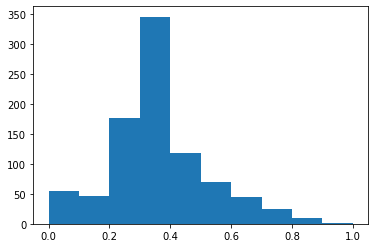

In [147]:
plt.hist(dataz['Age'])

ROBUST SCALER

In [148]:

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust= pd.DataFrame(scaler.fit_transform(dff),columns=dff.columns)
df_robust.head()

,Survived,Age,Fare
0,0.0,-0.461538,-0.312011
1,1.0,0.769231,2.461242
2,1.0,-0.153846,-0.282777
3,1.0,0.538462,1.673732
4,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

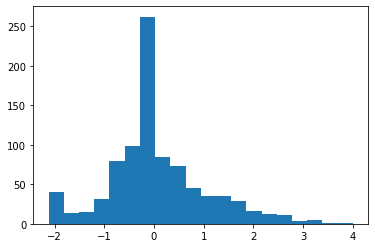

In [149]:
plt.hist(df_robust['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

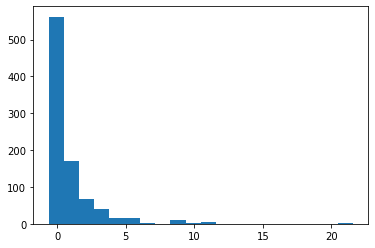

In [150]:
plt.hist(df_robust['Fare'],bins=20)

In [151]:
#we got a right skew whhile scaling to solve this isuue and make it nomalized curve we use transfomtion methods

#### TRANSFORMATION

#### Guassian Transformation (Normal Distribuation)

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [152]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [153]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [154]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [155]:
import scipy.stats as stat
import pylab

In [156]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

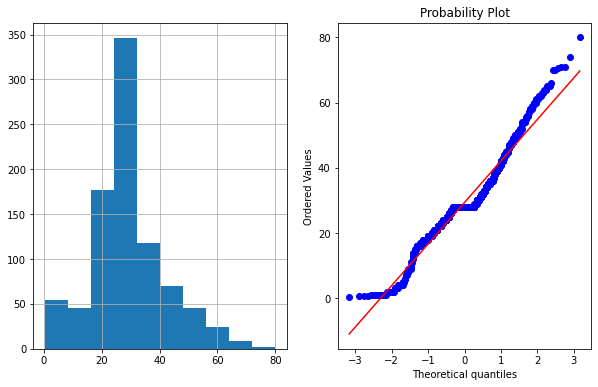

In [157]:
plot_data(df,'Age')

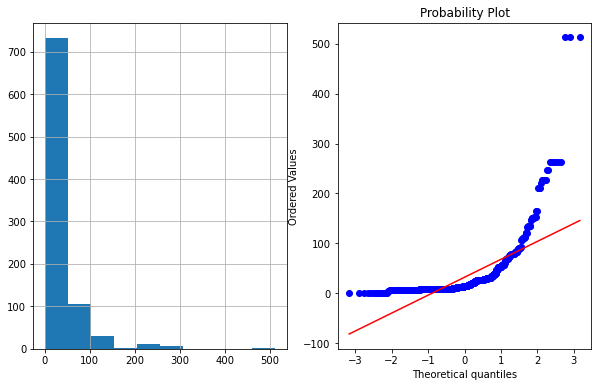

In [158]:
plot_data(df,'Fare')

In [159]:
#it is just checking how much normaly sidtributed in ech row is ,in second box show 
#how much normaly distributed , to make it more closer to normal distrribution,
#we are going to use some ml algorithm as transformation 

#### 1 LOG TRANSFORMATION

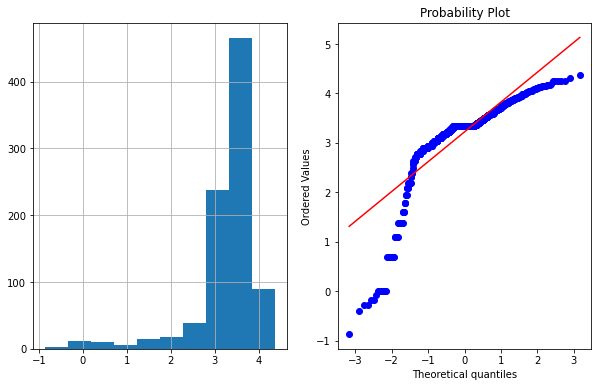

In [160]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

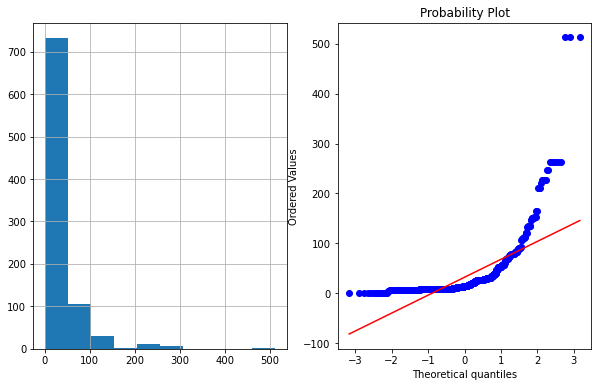

In [161]:
plot_data(df,'Fare')

In [162]:
# log cannot make to closer to normal distribution ,so it is failed

##### 2 RECIPROCAL TRANSFORMATION

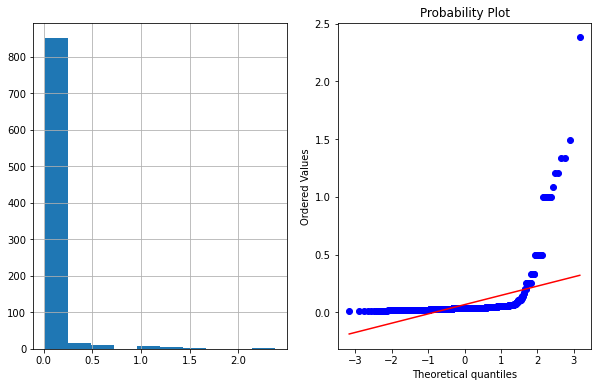

In [163]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

In [164]:
#it also failed to make normal distribution

#### 3 SQUARE ROTT TRANSFORMATION

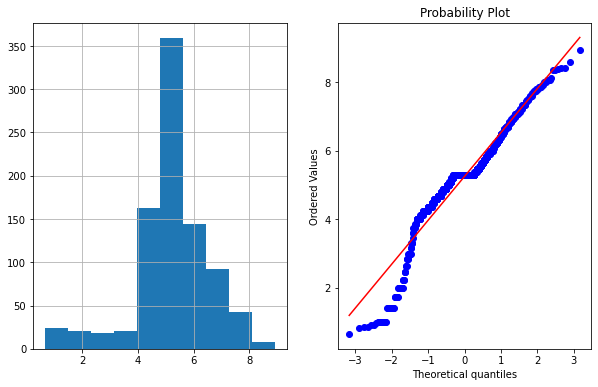

In [165]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

In [166]:
#it is not closer so  failed

#### Exponential Transformation

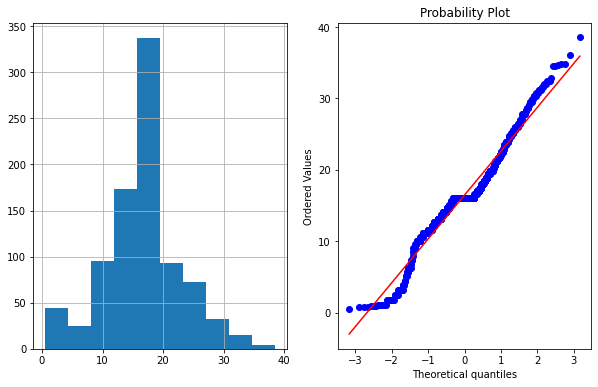

In [167]:

df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BOXCOX TRANSFORMATION

In [168]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

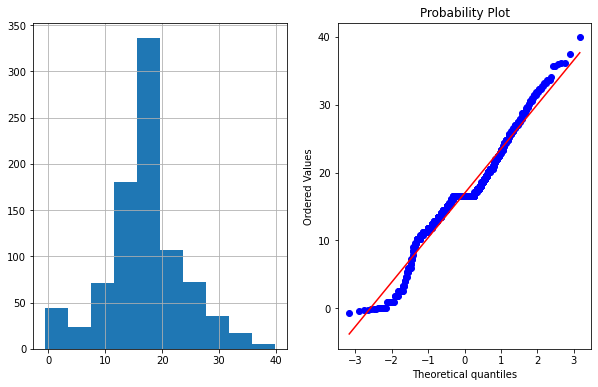

In [169]:
plot_data(df,'Age_Boxcox')

In [170]:
#it more closer to normal curve so i select this method